<a href="https://colab.research.google.com/github/Cosmic84/Forest_Fire_detection_Cnn/blob/main/forest_fire_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# step-1: Importing required libraries


In [2]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense


#step-2: Data preprocessing

In [3]:

img_height = 224
img_width = 224
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/data',
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/data',
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 999 files belonging to 2 classes.
Using 800 files for training.
Found 999 files belonging to 2 classes.
Using 199 files for validation.


# step-3: Building the model

In [4]:
model = Sequential([
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1)
])
model.compile(loss = tf.keras.losses.BinaryCrossentropy(from_logits=True), optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


# Step-4: Training the model

In [5]:
model.fit(train_ds, validation_data=test_ds, epochs=8)

Epoch 1/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 344s 13s/step - accuracy: 0.7213 - loss: 205.5521 - val_accuracy: 0.9447 - val_loss: 8.2045
Epoch 2/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 55s 639ms/step - accuracy: 0.9433 - loss: 3.3237 - val_accuracy: 0.9397 - val_loss: 1.2153
Epoch 3/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 560ms/step - accuracy: 0.9580 - loss: 0.4427 - val_accuracy: 0.9397 - val_loss: 1.1010
Epoch 4/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 565ms/step - accuracy: 0.9753 - loss: 0.1139 - val_accuracy: 0.9347 - val_loss: 0.9690
Epoch 5/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 555ms/step - accuracy: 0.9643 - loss: 0.1715 - val_accuracy: 0.9296 - val_loss: 0.5236
Epoch 6/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 546ms/step - accuracy: 0.9754 - loss: 0.0477 - val_accuracy: 0.9447 - val_loss: 0.7700
Epoch 7/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 616ms/step - accuracy: 0.9728 - loss: 0.0865 - val_accuracy: 0.9146 - val_loss: 1.0157
Epoch 8/8
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 568ms/step - accuracy: 0.9847 - loss: 0.0333 - val_accuracy: 0

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
print("Evaluting the model...")
loss, accuracy = model.evaluate(test_ds)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

Evaluting the model...
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 263ms/step - accuracy: 0.9408 - loss: 1.1269
Test loss: 1.0244371891021729
Test accuracy: 0.9346733689308167


# Step-5: Evaluating the model on a new dataset

# Step-6: Making a prediction on a single new image

In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np

img = image.load_img("/content/pexels-pixabay-266487.jpg", target_size=(224, 224))
img_array = image.img_to_array(img)
#img_array = img_array / 255.0  # IMPORTANT: same as training normalization
img_array = np.expand_dims(img_array, axis=0)

logits = model.predict(img_array)  # raw output (logits)
prob = tf.sigmoid(logits)[0][0].numpy()
print("Prediction:", prob)
print("No Fire" if prob >= 0.5 else "Fire")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Prediction: 0.0
Fire


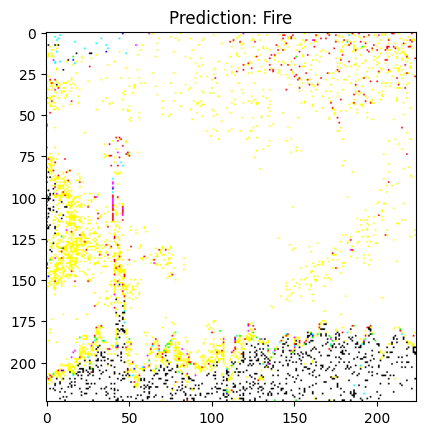

In [21]:
import matplotlib.pyplot as plt

plt.imshow(img_array[0])
plt.title(f"Prediction: {'No Fire' if prediction[0][0] >= 0.5 else 'Fire'}")
plt.show()


In [13]:
print(train_ds.class_names)  # Output determines label 0 vs 1


['Fire', 'No Fire']


SyntaxError: invalid syntax (<ipython-input-22-c738756dbb7f>, line 1)